Rewriting functions as Steve suggested/recommended. 
This should all be transfered to RayTraceFunCleaner when it works.

Mira


In [1]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from RayTraceFunClean import *
from random import uniform

In [2]:
#creates an ellipse with given coefficients at origin (0,0)
def CEBS(coeffellipse,length):
    xc=np.linspace(-float(length)/2,float(length)/2,100) #centers around angle
    yc1 = np.sqrt((1-(((xc)**2)/(coeffellipse[0]**2)))*coeffellipse[1]**2) #pos side of ellipse
    yc2 = -np.sqrt((1-(((xc)**2)/(coeffellipse[0]**2)))*coeffellipse[1]**2) #neg side of ellipse
    zc = np.linspace(0,0,100) #assumes merely in the x,y plane and uses 100 points
    return xc,yc1,yc2,zc

def RSBSC(theta, coeffellipse,length, sign):
    Rotated = []
    xc,yc1,yc2,zc = CEBS(coeffellipse,length)
    if sign == 'pos':
        for i in range (0,100): 
            v = [xc[i], yc1[i],zc[i]] # number of original points using POSITIVE side of ellipse
            v2 = np.array(np.dot(v,Rx(theta))) #multiplied by rotation vector 
            Rotated.append(v2[0]) #rotated vectors
    if sign == 'neg':
        for i in range (0,100):
            v = [xc[i], yc2[i], zc[i]] #number of original points on NEGATIVE side of ellipse
            v2 = np.array(np.dot(v,Rx(theta)))#multiplied by rotation vector 
            Rotated.append(v2[0]) #rotated vectors
    xcR1 = []
    ycR1 = []
    zcR1 = []
    for j in range (0,100): #recombining into arrays of x,y,z to be plotted
        xcR1.append(Rotated[j][0])
        ycR1.append(Rotated[j][1])
        zcR1.append(Rotated[j][2])
    return xcR1,ycR1,zcR1

def CZBSC(a,n, coeffellipse, length, sign):
    x1 = []
    y1 = []
    z1 = []
    for i in range (0,a):
        theta = np.linspace(0,n,a) #range from 0 to n angles in a divisions
        x,y,z = RSBSC(theta[i], coeffellipse, length, sign) #ellipse for specific angle
        x1.extend(x) #adding a new ellipse for each angle
        y1.extend(y)
        z1.extend(z)
    return x1,y1,z1 #returns all ellipses

def FTSEC (a,n, coeffellipse, length, sign):
    X,Y,Z = CZBSC(a,n, coeffellipse, length, sign) #negative side of zplane
    X1,Y1,Z1 = CZBSC(a,-n, coeffellipse, length, sign) #negative side zplane
    if sign != 'pos' and sign != 'neg':
        print ('Error')
    return X,Y,Z, X1, Y1, Z1

def sep(X): #translates into format for transform
    x,y,z = [],[],[]
    for i in range (0,len(X)):
        x.append(X[i][0])
        y.append(X[i][1])
        z.append(X[i][2])
    return x,y,z
def sepop(x,y,z): #translates back into series of [x,y,z] points
    v = []
    for i in range (0,len(x)):
        a = [x[i],y[i],z[i]]
        v.append(a)
    return v

def transform(x,y,z,origin, thetaxyz):
    if type(x) is int or type(x) is float or type(x) is numpy.float64:
        xT = x + origin[0] 
        yT = y + origin[1]
        zT = z + origin[2]
        v = [xT,yT,zT]
        v2i = np.array(np.dot(v,Rxyz(thetaxyz)))
        v2f = v2i[0]
        XTR = v2f[0]
        YTR = v2f[1]
        ZTR = v2f[2]
    else:
        XTR = []
        YTR = []
        ZTR = []
        xT = [x1 + origin[0] for x1 in x]
        yT = [y1 + origin[1] for y1 in y]
        zT = [z1 + origin[2] for z1 in z]
        for i in range (0, len(xT)):
            v = [xT[i], yT[i], zT[i]]
            v2i = np.array(np.dot(v,Rxyz(thetaxyz)))
            v2f = v2i[0]
            XTR.append(v2f[0])
            YTR.append(v2f[1])
            ZTR.append(v2f[2])
    return XTR, YTR, ZTR
    

origin1 = [0,0,0] #x,y (ellipse1)
#origin2 = [64.15,-128] #x,y (ellipse2)
#origin3 = [0,128] #x,y (ellipse3)
#origin4 = [64.15,128] #x,y  (ellipse4)
coeffellipse = [263.9,256,64.15] 
X1,Y1,Z1,X2,Y2,Z2 = FTSEC(50,np.pi/8, coeffellipse, 64.15, 'pos')
coeffellipse = [263.9,256,64.15] 


#NOW TRY TRANSFORM
origin1 = [0,-128,0]
thet = [0,0,0]
X1T,Y1T,Z1T = transform(X1,Y1,Z1,origin1,thet)
X2T,Y2T,Z2T = transform(X2,Y2,Z2,origin1,thet)
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot_trisurf(X1T,Y1T,Z1T, linewidth = .2, antialiased=True, color = 'red', label = 'Ellipse1')
pl3dsurf.plot_trisurf(X2T,Y2T,Z2T, linewidth = .2, antialiased=True, color = 'red')
pl.show()
#TRANSFORMING SEEMS TO WORK. NOW CHANGE THE INTERSECTION FUNCTION

In [3]:
#To make reflections AFTER the original source in the center ellipse(s). Essentially modifications of previous functions. 
def spec(n):
    x,y,z=[0],[0],[0]
    v = []
    for i in np.arange(n):
        theta=np.arccos(uniform(-1,1))
        phi=np.random.uniform(0,2*np.pi)
        xt=np.sin(theta)*np.cos(phi)
        yt=np.sin(theta)*np.sin(phi)
        zt=np.cos(theta)
        if zt<0.:
            zt=-zt
        a=uniform(0,1)
        while a>zt:
            theta=np.arccos(uniform(-1,1))
            phi=np.random.uniform(0,2*np.pi)
            xt=np.sin(theta)*np.cos(phi)
            yt=np.sin(theta)*np.sin(phi)
            zt=np.cos(theta)
            if zt<0.:
                zt=-zt
            a=uniform(0,1)
        x=np.append(x,xt)
        y=np.append(y,yt)
        z=np.append(z,zt)
        
    return x,y,z


'''EllipseLineIntShiftCorrecting(ELISC): give point on line, vector of line, coefficients of ellipse (assuming rotated around x axis), and shifted origin (assuming origin is still at z = 0). Returns intersection points. '''
def ELISC(pli1,v1,coeffellipse): #given point of line, vector, and the axes of the ellipse, find the intersection
    A = (1/coeffellipse[0]**2) + (v1[1]**2)/((v1[0]**2)*(coeffellipse[1])**2) + (v1[2]**2)/((v1[0]**2)*(coeffellipse[0]**2))
    B1 = -(2*pli1[0]*(v1[1]**2))/((v1[0]**2)*coeffellipse[1]**2) -(2*pli1[0]*(v1[2]**2))/((v1[0]**2)*coeffellipse[0]**2)
    B2 = (2*v1[1]*pli1[1])/((v1[0])*coeffellipse[1]**2)+ (2*v1[2]*pli1[2])/((v1[0])*coeffellipse[0]**2)
    B = B1 + B2
    C1 = ((pli1[0]**2)*(v1[1]**2))/((v1[0]**2)*coeffellipse[1]**2) + ((pli1[0]**2)*(v1[2]**2))/((v1[0]**2)*coeffellipse[0]**2)
    C2 = -(2*pli1[0]*v1[1]*pli1[1])/((v1[0])*(coeffellipse[1]**2)) -(2*pli1[0]*v1[2]*pli1[2])/((v1[0])*(coeffellipse[0]**2))
    C3 = (pli1[2]**2)/(coeffellipse[0]**2) + (pli1[1]**2)/(coeffellipse[1]**2)
    C = C1 + C2 + C3 - 1
    xint = [(-B + np.sqrt(B**2 - 4*A*C))/(2*A),(-B - np.sqrt(B**2 - 4*A*C))/(2*A)]
    yint = [((xint[0] - pli1[0])/(v1[0]))*v1[1] + pli1[1],((xint[1] - pli1[0])/(v1[0]))*v1[1] + pli1[1]]
    zint = [((xint[0] - pli1[0])/(v1[0]))*v1[2] + pli1[2], ((xint[1] - pli1[0])/(v1[0]))*v1[2] + pli1[2]]
    #xintshift = [x + origin[0] for x in xint]
    #yintshift = [y + origin[1] for y in yint]
    #yintshift = yint #does y not change what?
    #zintshift = [z + origin[2] for z in zint] (typically centered at zero)
    return xint,yint,zint #returns in frame of ellipse

'''ReflectEllipsePointCorrecting(REPC): give ellipse coefficients, point on line, vector of line, ellipse origin, and sign. Returns incident rays, reflecting rays, and intersection points for positive and negative intersection. Uses sign to determine correct direction of reflecting rays.   ''' 
def REPC(coeffellipse,pli,v, sign):
    c = TC(pli,v,coeffellipse) #plane coefficients
    cpos = c[0]
    cneg = c[1]
    VectL = v
    VectLNorm = N(v) #incident unit vector
    dU, Npos = PI(cpos) #gradient and normal of plane of positive int
    dUneg, Nneg = PI(cneg)
    VectL2 = VectLNorm - 2*Npos
    VectL2neg = VectLNorm-2*Nneg
    #check if it is going in the right direction for positive int
    if sign == 'neg' and VectL2[1] < 0 : 
        VectL2 = [-x for x in VectL2]
    if sign == 'pos' and VectL2[1] > 0:
        VectL2 = [-x for x in VectL2]
    #check if it is going in the right direction for negative int
    if sign == 'neg' and VectL2neg[1] < 0 : 
        VectL2neg = [-x for x in VectL2neg]
    if sign == 'pos' and VectL2neg[1] > 0:
        VectL2neg = [-x for x in VectL2neg]
    #VectLNorm2 = norm(VectL2) #reflected unit vector
    #xp,yp,zp = MP(c,r) #plane
    #xint,yint,zint = ELISC(pli,v,coeffellipse) #in frame of ellipse
    xint,yint,zint = ELI(pli,v,coeffellipse)
    #pointintRETURN = [xint,yint,zint]
    pointint = [float(xint[0]),float(yint[0]),float(zint[0])] #array and points of intersection
    pointintneg = [float(xint[1]),float(yint[1]),float(zint[1])] #array and points of intersection
    L1 = np.sqrt((pointint[0] - pli[0])**2 + (pointint[1] - pli[1])**2 + (pointint[2] - pli[2])**2)
    L1neg = np.sqrt((pointintneg[0] - pli[0])**2 + (pointintneg[1] - pli[1])**2 + (pointintneg[2] - pli[2])**2)
    xi,yi,zi = ML(pli,VectL,L1) #incident line from intersection point
    xr,yr,zr = ML(pointint,VectL2,L1)
    xin,yin,zin = ML(pli,VectL,L1neg) #incident line from intersection point
    xrn,yrn,zrn = ML(pointintneg,VectL2neg,L1neg)
    return xi,yi,zi,xr,yr,zr,xin,yin,zin,xrn,yrn,zrn, pointint, pointintneg, VectL2, VectL2neg

''' SetRange3dIndCorrecting (SR3IC): simply changing requirements. same as SR3I, just ignoring z.'''
def SR3IC (xrange, X,Y,Z, ellipseorigin, sign): #given range, one point, origin, if it lies in or not
    if sign == 'pos':
        if (X-ellipseorigin[0])**2 + (Z-ellipseorigin[2])**2 < xrange**2 and (Y-ellipseorigin[1]) > 0:
            return True
        return False
    if sign == 'neg':
        if (X-ellipseorigin[0])**2 + (Z-ellipseorigin[2])**2 < xrange**2 and (Y-ellipseorigin[1]) < 0:
            return True
        return False
    if sign != 'pos' and sign != 'neg':
        print ('Error')

'''reflect_specellipsePOINTCORRECTING (RSEPC): Give coeffients of ellipse, points of rays, vectors of rays, radius of target, origin of target, and sign. Returns initial rays, reflecting rays, intersection points, and reflecting vectors. '''
def RSEPC(coeffellipse,pli,vectors, xrange, ellipseorigin,ellipsethetaxyz, sign):
    xi = []
    yi = []
    zi = []
    xr = []
    yr = []
    zr = []
    Vect = []
    pointints = []
    if type(pli[0]) is int or type(pli[0]) is float: #assuming it is the source
        for i in range (0,len(vectors)):
            Vi = vectors[i]
            Vi2 = np.array(np.dot(Vi,Rx(np.pi/2)))
            xiL,yiL,ziL,xrL,yrL,zrL,xinL,yinL,zinL,xrnL,yrnL,zrnL, pointint, pointintneg = REP(coeffellipse,Vi2[0],pli)
            if SR3IC(xrange, pointint[0], pointint[1], pointint[2], ellipseorigin, sign) == True: 
                xi.append(xiL)
                yi.append(yiL)
                zi.append(ziL)
                xr.append(xrL)
                yr.append(yrL)
                zr.append(zrL)
                pointints.append(pointint)
                Vect.append(Vi2[0])
            if SR3IC(xrange, pointintneg[0], pointintneg[1], pointintneg[2], ellipseorigin, sign) == True:
                xi.append(xinL)
                yi.append(yinL)
                zi.append(zinL)
                xr.append(xrnL)
                yr.append(yrnL)
                zr.append(zrnL)
                pointints.append(pointintneg)
                Vect.append(Vi2[0])
    else:
        for i in range (0, len(vectors)):
            Vi = vectors[i]
            Pli = pli[i] #(or pli/original points of lines)
            xiL,yiL,ziL,xrL,yrL,zrL,xinL,yinL,zinL,xrnL,yrnL,zrnL, pointint, pointintneg, vectL2, vectL2neg = REPC(coeffellipse,Pli,Vi, sign)
            if SR3IC(xrange, pointint[0], pointint[1], pointint[2],ellipseorigin, sign) == True: 
                xi.append(xiL)
                yi.append(yiL)
                zi.append(ziL)
                xr.append(xrL)
                yr.append(yrL)
                zr.append(zrL)
                pointints.append(pointint) 
                Vect.append(vectL2)
            if SR3IC(xrange, pointintneg[0], pointintneg[1], pointintneg[2], ellipseorigin, sign) == True:
                xi.append(xinL)
                yi.append(yinL)
                zi.append(zinL)
                xr.append(xrnL)
                yr.append(yrnL)
                zr.append(zrnL)
                pointints.append(pointintneg)
                Vect.append(vectL2neg)
    return xi,yi,zi,xr,yr,zr, pointints, Vect


def negvect(vect):
    vectset = [[-y for y in x] for x in vect]
    return vectset

def spec(n):
    x,y,z = [],[],[]
    for i in np.arange(n):
        theta=np.arccos(uniform(-1,1))
        phi=np.random.uniform(0,2*np.pi)
        xt=np.sin(theta)*np.cos(phi)
        yt=np.sin(theta)*np.sin(phi)
        zt=np.cos(theta)
        if zt<0.:
            zt=-zt
        a=uniform(0,1)
        while a>zt:
            theta=np.arccos(uniform(-1,1))
            phi=np.random.uniform(0,2*np.pi)
            xt=np.sin(theta)*np.cos(phi)
            yt=np.sin(theta)*np.sin(phi)
            zt=np.cos(theta)
            if zt<0.:
                zt=-zt
            a=uniform(0,1)
        x=np.append(x,xt)
        y=np.append(y,yt)
        z=np.append(z,zt)
    V = []
    for i in np.arange(n):
        v = [x[i], y[i], z[i]]
        V.append(v)
        
    return x,y,z,V


#original ellipse
origin1 = [0,0,0] #x,y (ellipse1)
ellipsethetaxyz1 = [0,0,0]
coeffellipse = [263.9,256,64.15] 
X1,Y1,Z1,X2,Y2,Z2 = FTSEC(50,np.pi/8, coeffellipse, 64.15, 'pos')
coeffellipse = [263.9,256,64.15] 

#original line
pli1 = [0,240,0]
v1 = [0.01,1,-.5]
Li = 40
x,y,z = ML(pli1,v1,Li)

#original intersection and reflection 
xi12,yi12,zi12,xr12,yr12,zr12,xin,yin,zin,xrn,yrn,zrn, pointint, pointintneg, VectL2, VectL2neg = REPC(coeffellipse,pli1,v1, 'pos')


pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot_trisurf(X1,Y1,Z1, linewidth = .2, antialiased=True, color = 'red', label = 'Ellipse1')
pl3dsurf.plot_trisurf(X2,Y2,Z2, linewidth = .2, antialiased=True, color = 'red')
#pl3dsurf.plot(x,y,z, color = 'black')
pl3dsurf.plot(xi12,yi12,zi12, color = 'black')
pl3dsurf.plot(xr12,yr12,zr12, color = 'blue')
pl.show()

#now rotate it all
#original ellipse (AS IT IS IN V')
coeffellipse = [263.9,256,64.15] 
X1,Y1,Z1,X2,Y2,Z2 = FTSEC(50,np.pi/8, coeffellipse, 64.15, 'pos')

#transform (back to V)
origin2 = [100,-100,100] #x,y (ellipse1)
thet = [0,0,0]
X1T,Y1T,Z1T = transform(X1,Y1,Z1,origin2,thet)
X2T,Y2T,Z2T = transform(X2,Y2,Z2,origin2,thet)
coeffellipse = [263.9,256,64.15] 

#original line (in this case it is in V' space)
pli1 = [0,240,0]
v1 = [0.01,1,-.5]
Li = 40
#transform line (back to V)
pli1T = transform(0,240,0, origin2,thet)
v1T = [0.01,1,-.5]
LiT = 40

#SO given the line and the ellipse in V', can see it in V.

#original intersection and reflection 
xi,yi,zi,xr,yr,zr,xin,yin,zin,xrn,yrn,zrn, pointint, pointintneg, VectL2, VectL2neg = REPC(coeffellipse,pli1,v1, 'pos')
xiT,yiT,ziT = transform(xi,yi,zi, origin2, thet)
xrT,yrT,zrT = transform(xr,yr,zr, origin2,thet)



#should be the same as the previous plot but shifted
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot_trisurf(X1T,Y1T,Z1T, linewidth = .2, antialiased=True, color = 'red', label = 'Ellipse1')
pl3dsurf.plot_trisurf(X2T,Y2T,Z2T, linewidth = .2, antialiased=True, color = 'red')
#pl3dsurf.plot(x,y,z, color = 'black')
pl3dsurf.plot(xiT,yiT,ziT, color = 'black')
pl3dsurf.plot(xrT,yrT,zrT, color = 'blue')
pl.show()

#now rotate it all
#original ellipse (AS IT IS IN V')
coeffellipse = [263.9,256,64.15] 
X1,Y1,Z1,X2,Y2,Z2 = FTSEC(50,np.pi/8, coeffellipse, 64.15, 'pos')

#transform (back to V)
origin2 = [100,-100,100] #x,y (ellipse1)
thet = [np.pi/2,0,0]
X1T,Y1T,Z1T = transform(X1,Y1,Z1,origin2,thet)
X2T,Y2T,Z2T = transform(X2,Y2,Z2,origin2,thet)
coeffellipse = [263.9,256,64.15] 

#original line (in this case it is in V' space)
pli1 = [0,240,0]
v1 = [0.01,1,-.5]
Li = 40
#transform line (back to V)
pli1T = transform(0,240,0, origin2,thet)
v1T = [0.01,1,-.5]
LiT = 40

#SO given the line and the ellipse in V', can see it in V.

#original intersection and reflection 
xi,yi,zi,xr,yr,zr,xin,yin,zin,xrn,yrn,zrn, pointint, pointintneg, VectL2, VectL2neg = REPC(coeffellipse,pli1,v1, 'pos')
xiT,yiT,ziT = transform(xi,yi,zi, origin2, thet)
xrT,yrT,zrT = transform(xr,yr,zr, origin2,thet)



#should be the same as the previous plot but rotated about x
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot_trisurf(X1T,Y1T,Z1T, linewidth = .2, antialiased=True, color = 'red', label = 'Ellipse1')
pl3dsurf.plot_trisurf(X2T,Y2T,Z2T, linewidth = .2, antialiased=True, color = 'red')
#pl3dsurf.plot(x,y,z, color = 'black')
pl3dsurf.plot(xiT,yiT,ziT, color = 'black')
pl3dsurf.plot(xrT,yrT,zrT, color = 'blue')
pl.show()
#I THINK THIS IS WORKING

In [4]:
#so then all center ellipses:  (these are the GLOBAL origins)
origin1 = [0,-128,0] #x,y (ellipse1)
origin2 = [64.15,-128,0] #x,y (ellipse2)
origin3 = [0,128,0] #x,y (ellipse3)
origin4 = [64.15,128,0] #x,y  (ellipse4)
coeffellipse = [263.9,256,64.15] 
thet = [0,0,0]

X1,Y1,Z1,X2,Y2,Z2 = FTSEC(50,np.pi/8, coeffellipse, 64.15, 'pos')
X1n,Y1n,Z1n,X2n,Y2n,Z2n = FTSEC(50,np.pi/8, coeffellipse, 64.15, 'neg')

Xset1, Yset1, Zset1 = SR2(32.07, X1,Y1,Z1, origin1)
Xset2, Yset2, Zset2 = SR2(32.07, X2, Y2, Z2, origin1)
Xset1n, Yset1n, Zset1n = SR2(32.07, X1n,Y1n,Z1n, origin1)
Xset2n, Yset2n, Zset2n = SR2(32.07, X2n, Y2n, Z2n, origin1)


#ellipse 1
X1i,Y1i,Z1i = transform(Xset1,Yset1,Zset1,origin1,thet)
X2i,Y2i,Z2i = transform(Xset2,Yset2,Zset2,origin1,thet)

#ellipse 3
X1n,Y1n,Z1n = transform(Xset1n,Yset1n,Zset1n,origin3,thet)
X2n,Y2n,Z2n = transform(Xset2n,Yset2n,Zset2n,origin3,thet)

#ellipse 2
X3,Y3,Z3 = transform(Xset1,Yset1,Zset1,origin2,thet)
X4,Y4,Z4 = transform(Xset2,Yset2,Zset2,origin2,thet)

#ellipse 4
X3n,Y3n,Z3n = transform(Xset1n,Yset1n,Zset1n,origin4,thet)
X4n,Y4n,Z4n = transform(Xset2n,Yset2n,Zset2n,origin4,thet)


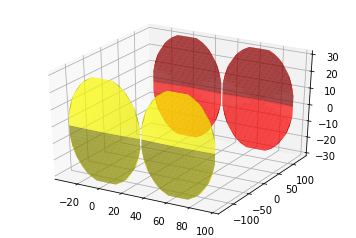

In [5]:
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot_trisurf(X1i,Y1i,Z1i, linewidth = .2, antialiased=True, color = 'red', label = 'Ellipse1')
pl3dsurf.plot_trisurf(X2i,Y2i,Z2i, linewidth = .2, antialiased=True, color = 'red')
pl3dsurf.plot_trisurf(X1n,Y1n,Z1n, linewidth = .2, antialiased=True, color = 'yellow', label = "Ellipse2")
pl3dsurf.plot_trisurf(X2n,Y2n,Z2n, linewidth = .2, antialiased=True, color = 'yellow')
pl3dsurf.plot_trisurf(X3,Y3,Z3, linewidth = .2, antialiased=True, color = 'red', label = 'Ellipse1')
pl3dsurf.plot_trisurf(X4,Y4,Z4, linewidth = .2, antialiased=True, color = 'red')
pl3dsurf.plot_trisurf(X3n,Y3n,Z3n, linewidth = .2, antialiased=True, color = 'yellow', label = "Ellipse2")
pl3dsurf.plot_trisurf(X4n,Y4n,Z4n, linewidth = .2, antialiased=True, color = 'yellow')

pl.show()

#THIS CLEARLY DOES WORK. now do intersection with rotating shit correctly

In [6]:
pli1 = [0,125,0]
theta1 = np.pi/2
specnum1 = 3000
xrange1 = 32
coeffellipse = [263.9,256,64.15]
x,y,z, vectors1 = spec(1000)
ellipseorigin1 = [0,0,0] #LOCALLY. Globally it is ORIGIN1
ellipsethetaxyz1 = [0,0,0]

xi,yi,zi,xr,yr,zr, pointints1, vect1 = RSEPC(coeffellipse,pli1,vectors1, xrange1, ellipseorigin1,ellipsethetaxyz1, 'pos')


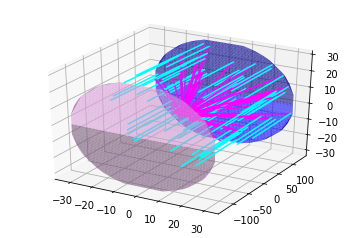

In [13]:
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot_trisurf(X1i,Y1i,Z1i, linewidth = .2, antialiased=True, color = 'blue',alpha=0.7)
pl3dsurf.plot_trisurf(X2i,Y2i,Z2i, linewidth = .2, antialiased=True, color = 'blue',alpha=0.7)
pl3dsurf.plot_trisurf(X1n,Y1n,Z1n, linewidth = .2, antialiased=True, color = 'plum',alpha=0.7)
pl3dsurf.plot_trisurf(X2n,Y2n,Z2n, linewidth = .2, antialiased=True, color = 'plum',alpha=0.7)
for n in range (0,len(xi)):
    xi1,yi1,zi1 = xi[n],yi[n],zi[n]
    xt,yt,zt = transform(xi1,yi1,zi1,origin1,thet)
    xr1,yr1,zr1 = xr[n],yr[n],zr[n]
    xrt,yrt,zrt = transform(xr1,yr1,zr1,origin1,thet)
    #pl3dsurf.scatter((transform(pointints1[n][0], pointints1[n][1], pointints1[n][2],origin1,thet))[0],(transform(pointints1[n][0], pointints1[n][1], pointints1[n][2],origin1,thet))[1],(transform(pointints1[n][0], pointints1[n][1], pointints1[n][2],origin1,thet))[2], color = 'black')
    pl3dsurf.plot(xt,yt,zt,color = 'magenta') #initial
    pl3dsurf.plot(xrt,yrt,zrt,color = 'aqua') #reflected
    #pl3dsurf.plot(transform(xi[n][0],xi[n][1],xi[n][2],origin1,thet),transform(yi[n][0],yi[n][1],yi[n][2],origin1,thet),transform(zi[n][0],zi[n][1],zi[n][2],origin1,thet), color = 'yellow') #intial
    #pl3dsurf.plot(transform(xr[n][0],xr[n][1],xr[n][2],origin1,thet),transform(yr[n][0],yr[n][1],yr[n][2],origin1,thet),transform(zr[n][0],zr[n][1],zr[n][2],origin1,thet), color = 'green') #reflected

pl.show()

#figure out transforming origin1,thet



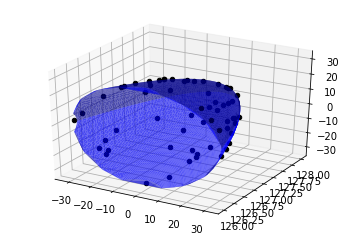

In [16]:
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot_trisurf(X1i,Y1i,Z1i, linewidth = .2, antialiased=True, color = 'blue',alpha=0.7)
pl3dsurf.plot_trisurf(X2i,Y2i,Z2i, linewidth = .2, antialiased=True, color = 'blue',alpha=0.7)
for n in range (0,len(xi)):
    pl3dsurf.scatter((transform(pointints1[n][0], pointints1[n][1], pointints1[n][2],origin1,thet))[0],(transform(pointints1[n][0], pointints1[n][1], pointints1[n][2],origin1,thet))[1],(transform(pointints1[n][0], pointints1[n][1], pointints1[n][2],origin1,thet))[2], color = 'black')
pl.show()
#intersection points APPROPRIATELY TRANSFORMED to origin1

In [19]:
#ok so now taking the blue lines from above, reflect them off of the purple (ellipse 3)
#SHIFT FROM ONE LOCAL TO ANOTHER LOCAL then TRANSFORM to global
xrange1 = 32
coeffellipse = [263.9,256,64.15] 
vectors2 = negvect(vect1) #vectors from reflected. HOW TO TRANSFORM? 
x,y,z = sep(pointints1) #MAKES LIST OF X,Y,Z instead of list of points
originshift = [0,256,0]
x,y,z = transform(x,y,z,originshift,thet) #shifts origins
pli2 = sepop(x,y,z)
ellipseorigin2 = [0,0,0] #LOCALLY
ellipsethetaxyz1 = [0,0,0]

xi2,yi2,zi2,xr2,yr2,zr2, pointints2, vect2 = RSEPC(coeffellipse,pli2,vectors2, xrange1, ellipseorigin2,ellipsethetaxyz1, 'neg')


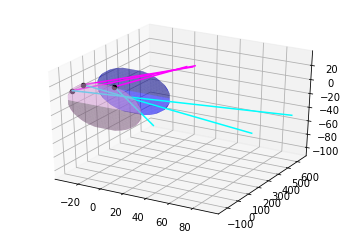

In [22]:
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot_trisurf(X1i,Y1i,Z1i, linewidth = .2, antialiased=True, color = 'blue',alpha=0.7)
pl3dsurf.plot_trisurf(X2i,Y2i,Z2i, linewidth = .2, antialiased=True, color = 'blue',alpha=0.7)
pl3dsurf.plot_trisurf(X1n,Y1n,Z1n, linewidth = .2, antialiased=True, color = 'plum',alpha=0.7)
pl3dsurf.plot_trisurf(X2n,Y2n,Z2n, linewidth = .2, antialiased=True, color = 'plum',alpha=0.7)
for n in range (0,len(xi2)):   
    pl3dsurf.scatter((transform(pointints2[n][0], pointints2[n][1], pointints2[n][2],origin3,thet))[0],(transform(pointints2[n][0], pointints2[n][1], pointints2[n][2],origin3,thet))[1],(transform(pointints2[n][0], pointints1[n][1], pointints2[n][2],origin3,thet))[2], color = 'black')
    xi1,yi1,zi1 = xi2[n],yi2[n],zi2[n]
    xt,yt,zt = transform(xi1,yi1,zi1,origin3,thet)
    xr1,yr1,zr1 = xr2[n],yr2[n],zr2[n]
    xrt,yrt,zrt = transform(xr1,yr1,zr1,origin3,thet)
    pl3dsurf.plot(xt,yt,zt,color = 'magenta')
    pl3dsurf.plot(xrt,yrt,zrt,color = 'aqua')

pl.show()

#figure out transforming origin1,thet

# all of this for email to Meyer regarding reference frames

#original line
pli1 = [0,240,0]
v1 = [0.01,1,-.11]
v1n = [-0.01,-1,.11]
Li = 100
xS,yS,zS = ML(pli1,v1,Li)

#original intersection and reflection 
xi12,yi12,zi12,xr12,yr12,zr12,xin,yin,zin,xrn,yrn,zrn, pointint, pointintneg, VectL2, VectL2neg = REPC(coeffellipse,pli1,v1, 'pos')

#reflected line
xs2,ys2,zs2 = ML(pointint,VectL2,Li)
xS,yS,zS = ML(pointint,v1n,Li)
Globalorigin = [0,0,0]
Zax = [.00001,.00001,1]
Zn = [.00001,.00001,-1]
Yax = [.00001,1,.00001]
Yn = [.00001,-1,.00001]
Xax = [1,.00001,.00001]
Xn = [-1,.00001,.00001]
Zx,Zy,Zz = ML(Globalorigin,Zax, 30)
Yx,Yy,Yz = ML(Globalorigin,Yax, 100)
Xx,Xy,Xz = ML(Globalorigin,Xax, 30)
Zxn,Zyn,Zzn = ML(Globalorigin,Zn, 30)
Yxn,Yyn,Yzn = ML(Globalorigin,Yn, 100)
Xxn,Xyn,Xzn = ML(Globalorigin,Xn, 30)

pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot_trisurf(X1i,Y1i,Z1i, linewidth = .2, antialiased=True, color = 'blue')
pl3dsurf.plot_trisurf(X2i,Y2i,Z2i, linewidth = .2, antialiased=True, color = 'blue')
pl3dsurf.plot_trisurf(X1n,Y1n,Z1n, linewidth = .2, antialiased=True, color = 'white')
pl3dsurf.plot_trisurf(X2n,Y2n,Z2n, linewidth = .2, antialiased=True, color = 'white')

pl3dsurf.plot(Zx,Zy,Zz, color = 'black')
pl3dsurf.plot(Yx,Yy,Yz, color = 'black')
pl3dsurf.plot(Xx,Xy,Xz, color = 'black')
pl3dsurf.plot(Zxn,Zyn,Zzn, color = 'black')
pl3dsurf.plot(Yxn,Yyn,Yzn, color = 'black')
pl3dsurf.plot(Xxn,Xyn,Xzn, color = 'black')

pl3dsurf.plot(xS,yS,zS, color = 'pink')
pl3dsurf.plot(xs2,ys2,zs2, color = 'lawngreen')

pl.show()

